### Introduction:
We want to pick neighborhoods in pittsburgh to potentially purchase properties from.
Metrics:
- Crime: Occurence of crime in particular neigbhorhood
- City owned property: the more property that city owns in a neighborhood the less economically neighborhood is
- Population: the livelihood of the niegborhood

In [25]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

https://data.wprdc.org/dataset/uniform-crime-reporting-data/resource/044f2016-1dfd-4ab0-bc1e-065da05fca2e

### Crime data

In [2]:
df = pd.read_csv("crime.csv")
df.head()

,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,3,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,4,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,5,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651


In [3]:
incidents = df.INCIDENTNEIGHBORHOOD.value_counts().rename_axis('Neighborhood').reset_index(name='counts')
incidents.head()
                                                                                          

,Neighborhood,counts
0,Central Business District,19258
1,South Side Flats,18604
2,Carrick,11637
3,Shadyside,8537
4,Bloomfield,8520


In [4]:
#add mt.oliver boro and neighbrohood together
sum_counts = incidents.loc[96, 'counts']+incidents.loc[97,'counts']
incidents.loc[96,'counts'] = sum_counts

incidents = incidents.drop(97)

### Property owned by the city

https://data.wprdc.org/dataset/city-owned-properties/resource/e1dcee82-9179-4306-8167-5891915b62a7

In [5]:
df = pd.read_csv("house.csv")
df.head()

,_id,id,parc,pin,address,owner,parc_sq_ft,class,zoned_as,inventory_type,...,longitude,census_tract,neighborhood_name,council_district,ward,fire_zone,police_zone,dpw_streets,dpw_enviro,dpw_parks
0,1590374,959130,0011K00271000300,0011K00271000300,2013 BLVD OF THE ALLIES,City of Pittsburgh,1024.0,Building,R1A-H,URA Transfer,...,-79.977407,4.200301e+10,Bluff,6.0,1.0,2-1,2.0,3.0,Central,Schenley
1,1590375,959131,0011K00271001000,0011K00271001000,2005 BLVD OF THE ALLIES,City of Pittsburgh,450.0,Building,R1A-H,URA Transfer,...,-79.977602,4.200301e+10,Bluff,6.0,1.0,2-1,2.0,3.0,Central,Schenley
2,1590376,959132,0011F00173000000,0011F00173000000,2037 DE RUAD ST,City of Pittsburgh,3000.0,Vacant Land,R2-VH,URA Transfer,...,-79.975146,4.200304e+10,West Oakland,6.0,4.0,2-1,4.0,3.0,Central,Schenley
3,1590377,959133,0011G00043000000,0011G00043000000,126 MOULTRIE ST,City of Pittsburgh,1600.0,Vacant Land,R2-VH,URA Transfer,...,-79.973866,4.200304e+10,West Oakland,6.0,4.0,2-1,4.0,3.0,Central,Schenley
4,1590378,959134,0011K00045000000,0011K00045000000,2112 5TH AVE,City of Pittsburgh,1771.0,Building,LNC,URA Transfer,...,-79.975386,4.200301e+10,Bluff,6.0,4.0,2-1,2.0,3.0,Central,Schenley


In [6]:
house=df.neighborhood_name.value_counts().rename_axis('Neighborhood').reset_index(name='counts')
house.head()

,Neighborhood,counts
0,Hazelwood,908
1,Perry South,856
2,Homewood North,596
3,Larimer,564
4,Garfield,453


### Population
https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data/resource/82f29015-6905-4b1c-8300-afe9bb2231b3

In [7]:
pop = pd.read_csv("population.csv")
pop.head()

,Neighborhood,Id,Estimate; Total,Margin of Error; Total
0,Allegheny Center,1,1411,196.000000
1,Allegheny West,2,343,96.000000
2,Allentown,3,2558,449.773276
3,Arlington,4,1852,348.188167
4,Arlington Heights,5,272,126.000000


In [8]:
pop.columns

Index(['Neighborhood', 'Id', 'Estimate; Total', 'Margin of Error; Total'], dtype='object')

In [9]:
#drop margin of error columns
drop_col = ['Id', 'Margin of Error; Total']
pop = pop.drop(columns=drop_col)
#rename 'estimate; total' to counts
pop=pop.rename(columns={'Estimate; Total':'counts'})
pop.head()

,Neighborhood,counts
0,Allegheny Center,1411
1,Allegheny West,343
2,Allentown,2558
3,Arlington,1852
4,Arlington Heights,272


In [10]:
pop_desc = pop.sort_values(by='counts', ascending=False)
pop_desc

,Neighborhood,counts
76,Squirrel Hill South,16042
67,Shadyside,13562
13,Brookline,13160
75,Squirrel Hill North,11336
15,Carrick,10122
...,...,...
77,St. Clair,270
86,West End,235
56,North Shore,205
70,South Shore,12


### data cleaning and find the common neighborhood for a three dataset

In [11]:
#commone elements between house and incidents
home = house['Neighborhood'].tolist()
inci = incidents['Neighborhood'].tolist()

common_elements = set(home).intersection(set(inci))
ce = list(common_elements)

#### create dataframe for common elements for incidents and city owned property

In [12]:
#drop the columns that are not in common elements
h_df = house[house['Neighborhood'].isin(ce)]
i_df = incidents[incidents['Neighborhood'].isin(ce)]

#sort columns columns alphabetically
#housing
hdf = h_df.sort_values(by='Neighborhood')
#incidents
idf = i_df.sort_values(by='Neighborhood')

#merge the two dataset together 
df = pd.merge(hdf,idf, on='Neighborhood')
#rename columns counts_x and counts_y to property and incidents
df = df.rename(columns={'counts_x': 'property','counts_y':'crime'})


#### now that we have df for incidents and city owned property lets find the common neighborhood between population

In [13]:
pop_col = set(pop['Neighborhood'])
df_col = set(df['Neighborhood'])

intersection = list(pop_col.intersection(df_col))

#drop the rows that are not in commone elements between df and population
pdf = pop[pop['Neighborhood'].isin(intersection)]

#merge df and population together
df = pd.merge(pdf,df, on = 'Neighborhood')
#rename counts to population
df = df.rename(columns={'counts':'population'})
df.head()

,Neighborhood,population,property,crime
0,Allegheny Center,1411,15,3532
1,Allegheny West,343,4,1077
2,Allentown,2558,217,5164
3,Arlington,1852,83,2109
4,Arlington Heights,272,1,561


### Population

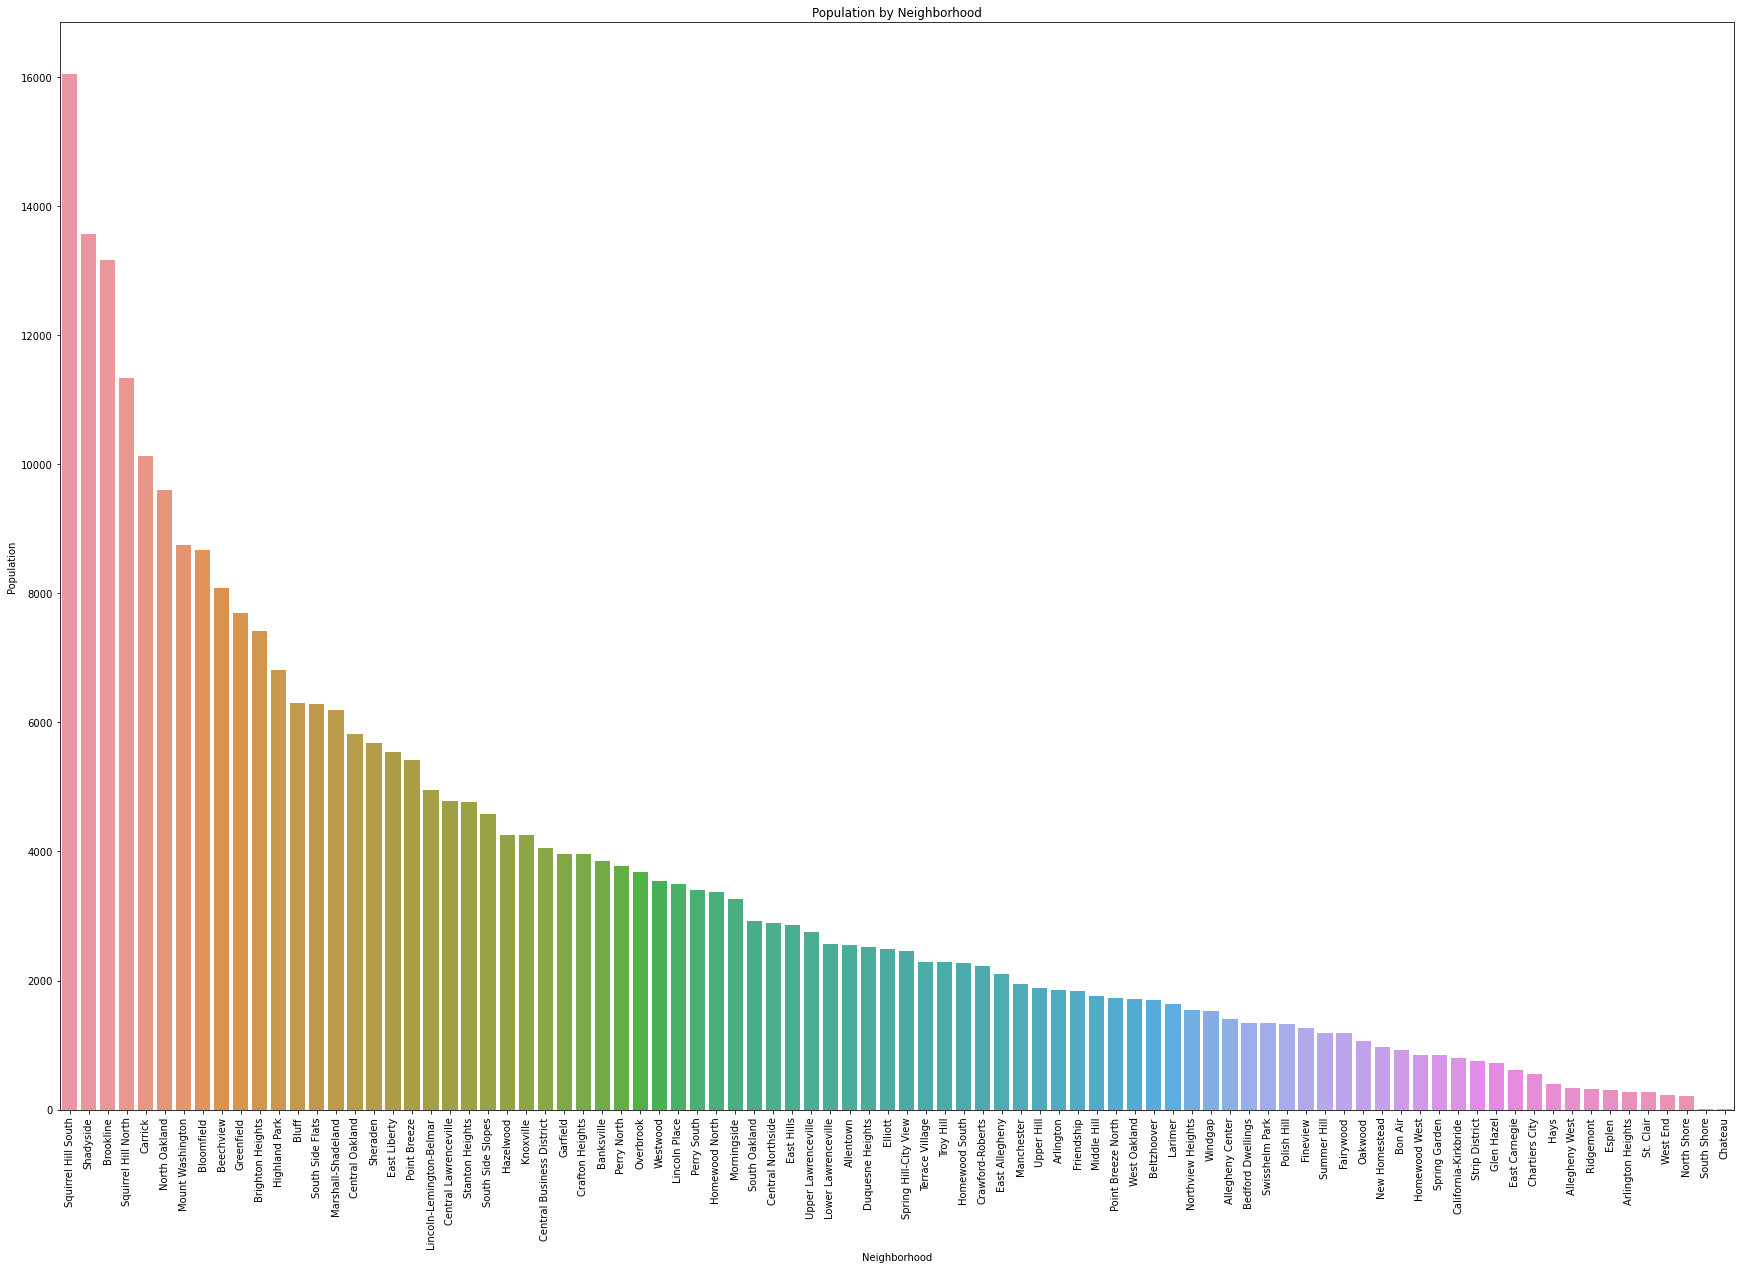

In [14]:
#descending order for population
col_drop = ['property','crime']
df_p = df.drop(col_drop, axis = 1)
df_p = df_p.sort_values(by='population', ascending = False)

plt.figure(figsize=(30, 20))  # Set the size of the plot

sns.barplot(x='Neighborhood', y='population', data=df_p)
plt.title('Population by Neighborhood')

plt.xlabel('Neighborhood')
plt.ylabel('Population')

plt.xticks(rotation=90)
plt.show()

### Property

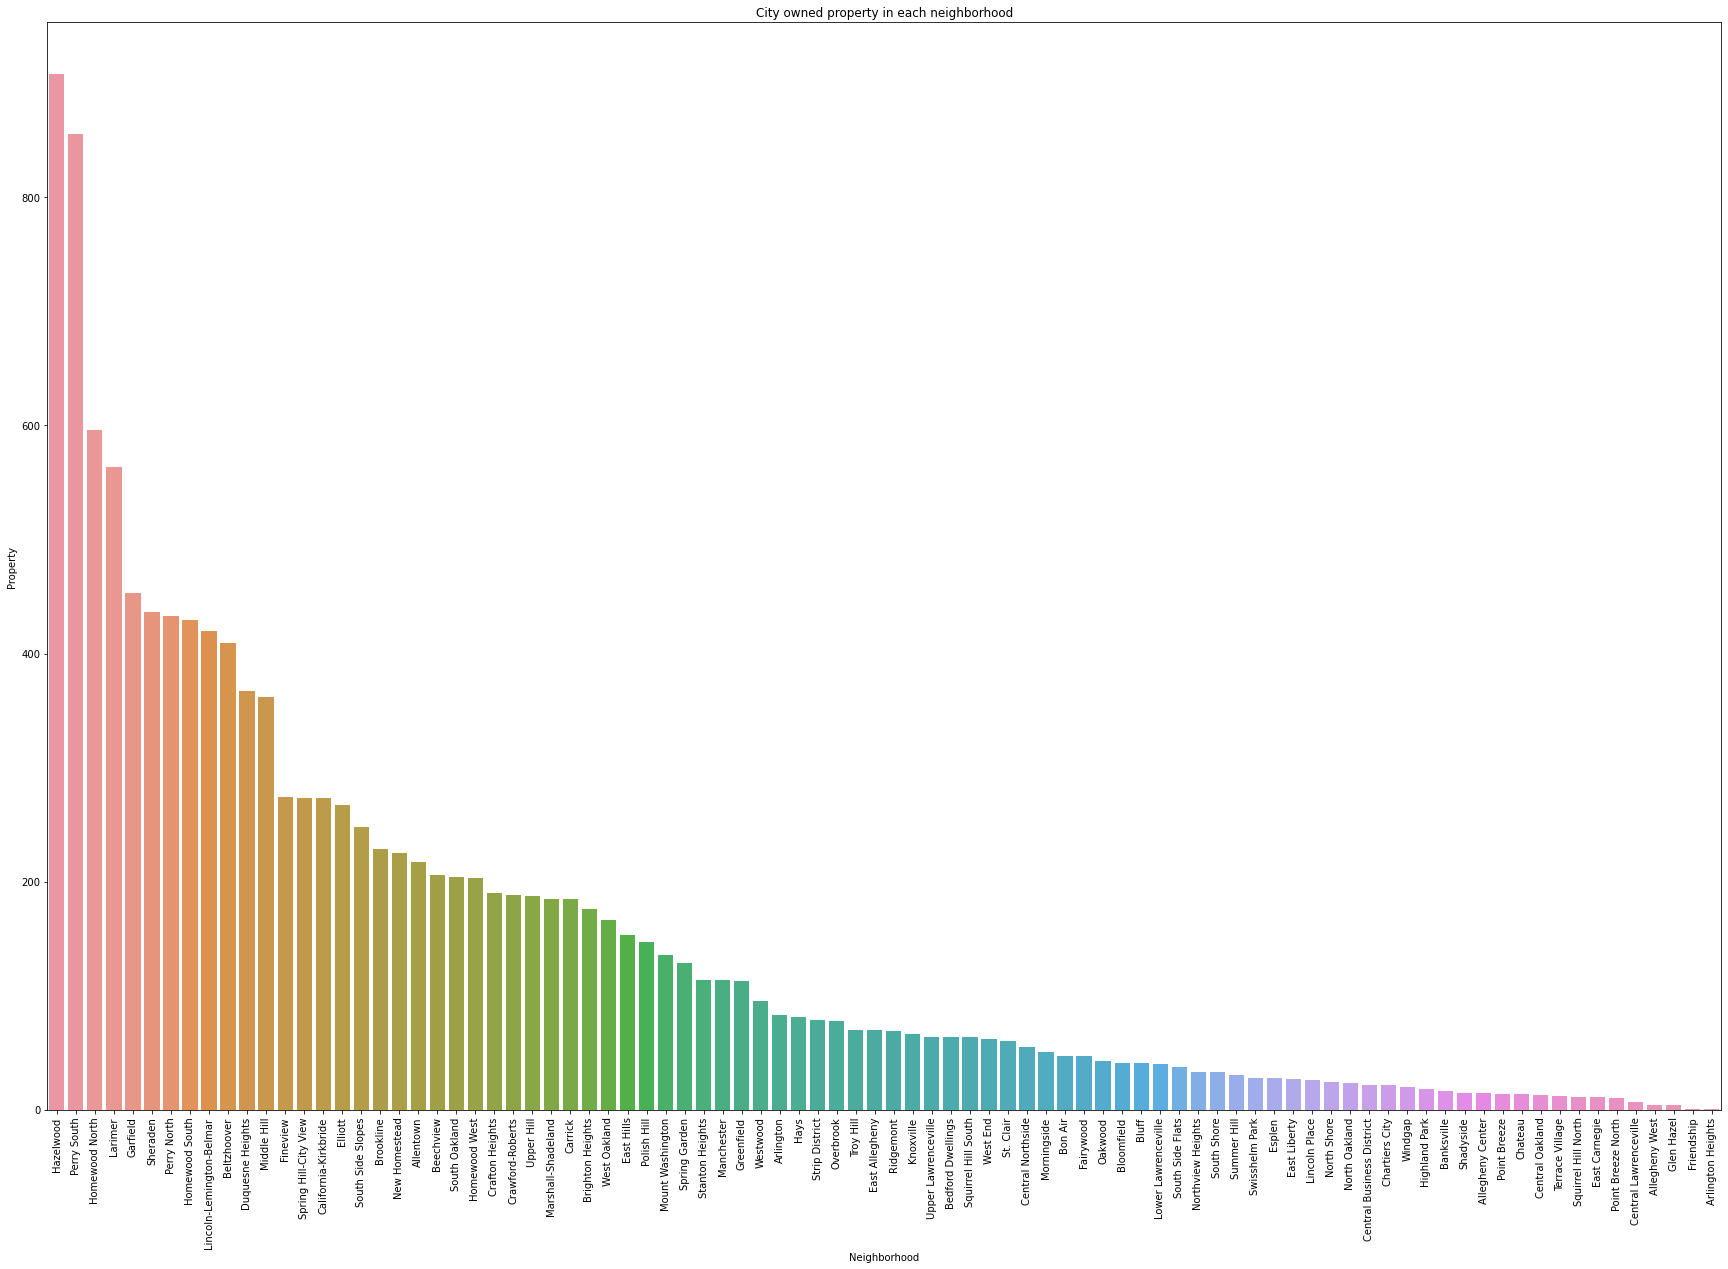

In [15]:
#descending order for population
col_drop = ['population','crime']
df_pr = df.drop(col_drop, axis = 1)
df_pr = df_pr.sort_values(by='property', ascending = False)


plt.figure(figsize=(30, 20))  
sns.barplot(x='Neighborhood', y='property', data=df_pr)
plt.title('City owned property in each neighborhood')

plt.xlabel('Neighborhood')
plt.ylabel('Property')

plt.xticks(rotation=90)
plt.show()

### crime

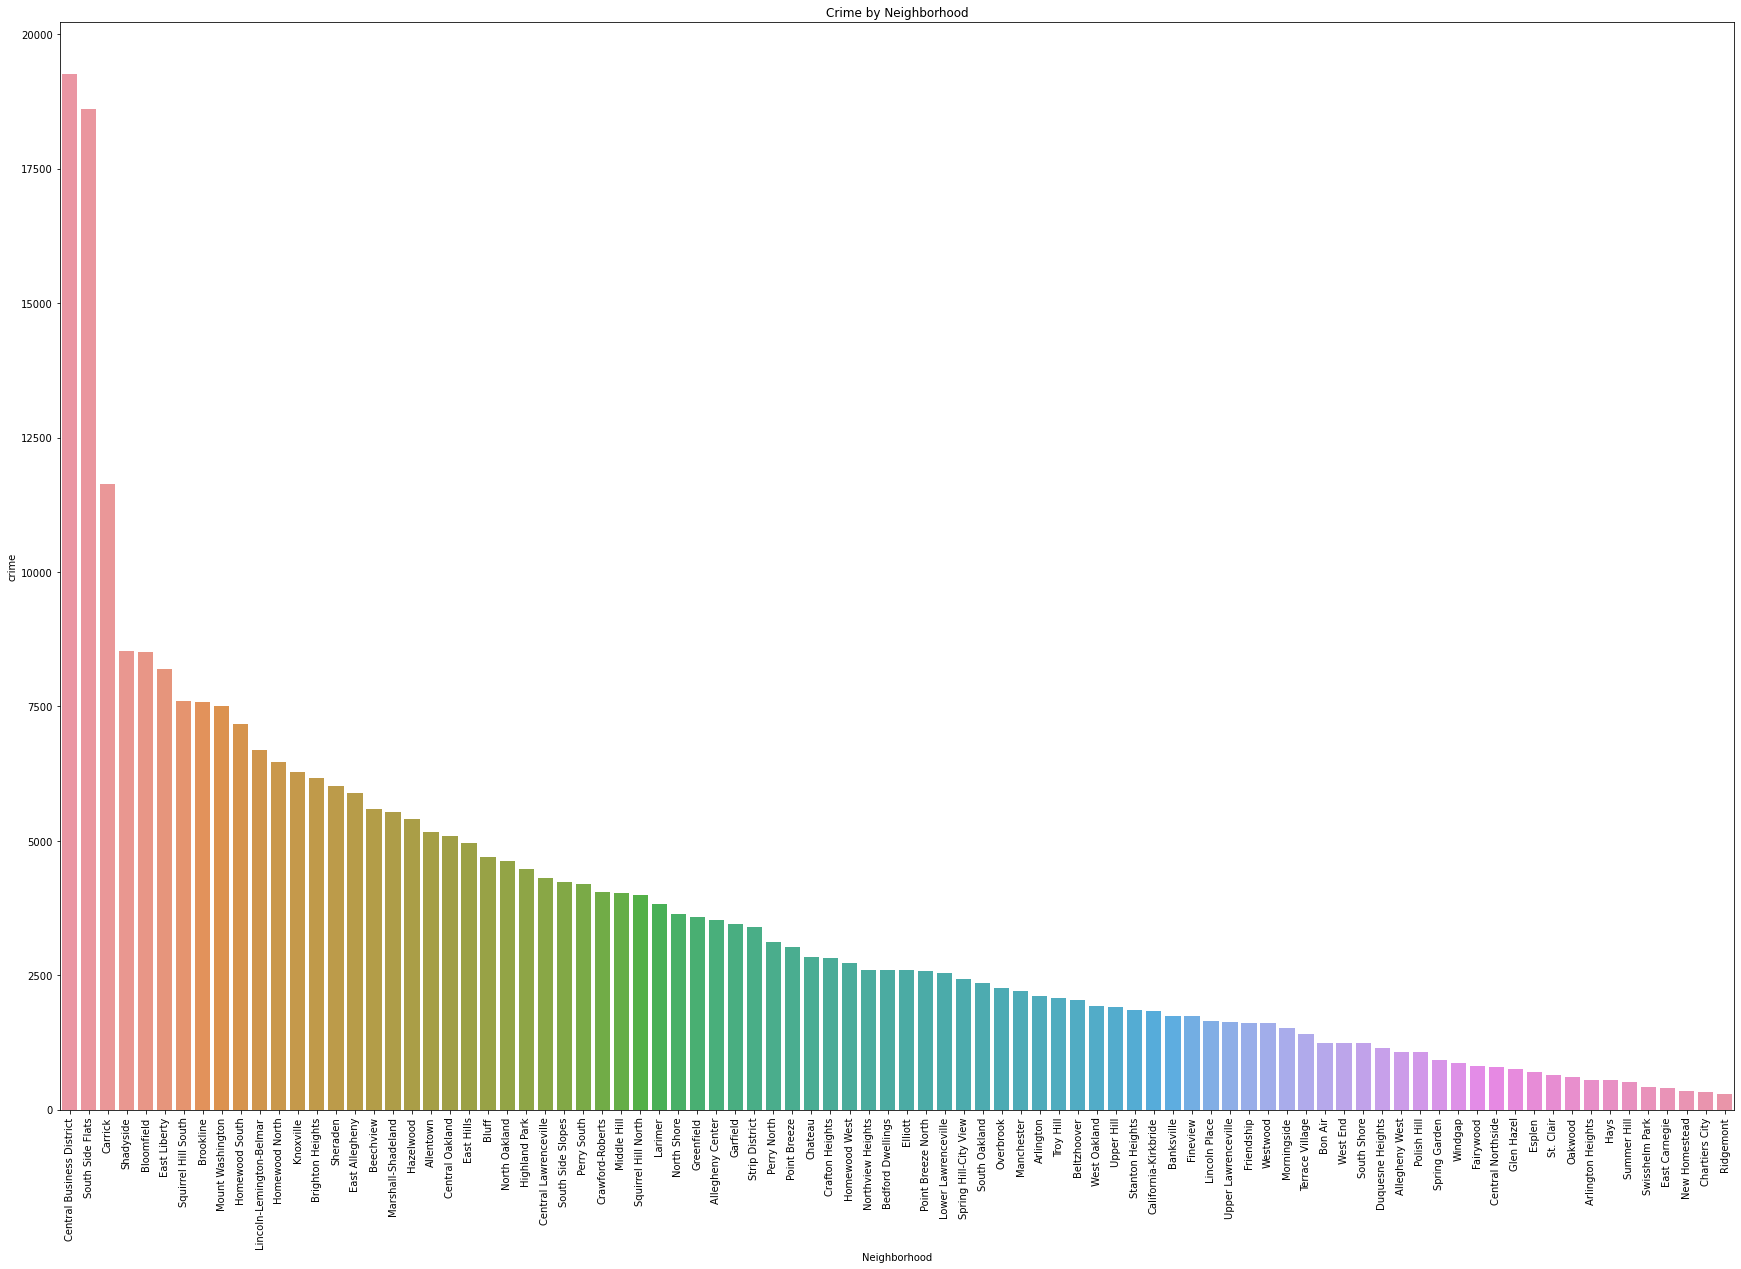

In [16]:
#descending order for population
col_drop = ['property','population']
df_c = df.drop(col_drop, axis = 1)
df_c = df_c.sort_values(by='crime', ascending = False)



plt.figure(figsize=(30, 20))
sns.barplot(x='Neighborhood', y='crime', data=df_c)
plt.title('Crime by Neighborhood')

plt.xlabel('Neighborhood')
plt.ylabel('crime')

plt.xticks(rotation=90)
plt.show()

### GRAPH ALL THREE TOGETHER

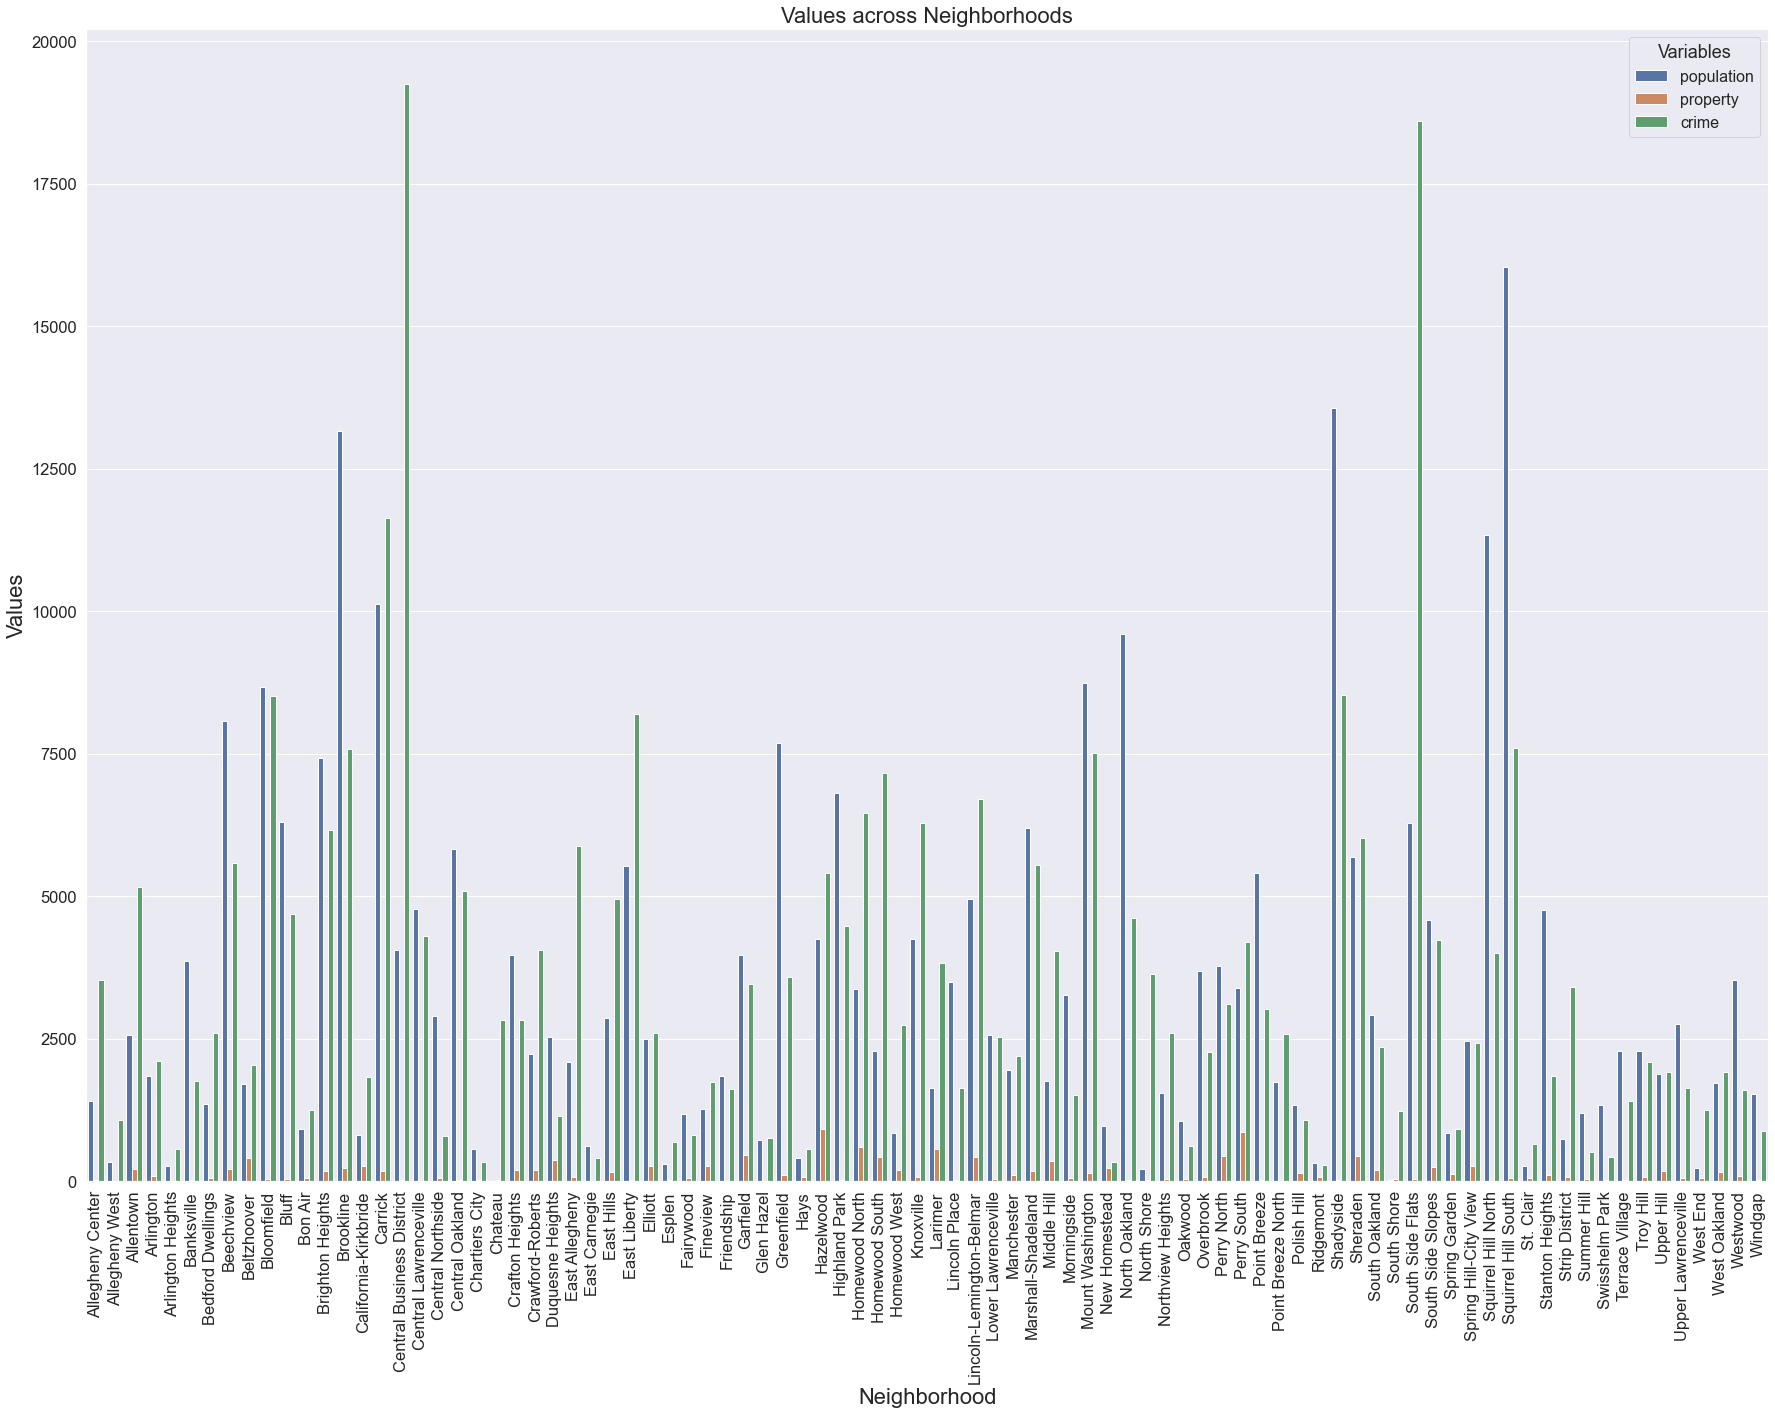

In [17]:
import seaborn as sns
df_melted = df.melt(id_vars='Neighborhood', var_name='Variables', value_name='Values')

# Create a bar plot using Seaborn
plt.figure(figsize=(25, 20))
sns.set(font_scale=1.5) 
ax = sns.barplot(x='Neighborhood', y='Values', hue='Variables', data=df_melted)
plt.xlabel('Neighborhood', fontsize=22) 
plt.ylabel('Values', fontsize=22) 
plt.title('Values across Neighborhoods', fontsize=22) 
plt.legend(title='Variables', fontsize=16)  

# Rotate x-axis labels vertically
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout() 
plt.show()

In [18]:
dfw=df

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns for normalization
selected_columns = ['crime', 'property', 'population']

# Create a MinMaxScaler 
scaler = MinMaxScaler()

# Normalize the selected columns so the outliers won't affect the data
dfw[selected_columns] = scaler.fit_transform(dfw[selected_columns])

dfw.head()

C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
C:\Users\David\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Neighborhood,population,property,crime
0,Allegheny Center,0.087786,0.015436,0.170832
1,Allegheny West,0.021198,0.003308,0.041390
2,Allentown,0.159299,0.238148,0.256881
3,Arlington,0.115282,0.090408,0.095803
4,Arlington Heights,0.016772,0.000000,0.014183


In [20]:
# Assign weights
weights = {
    'crime': 3,  # Assign a weight for 'crime'
    'property': 2,  # Assign a weight for 'property'
    'population': 1 # Assign a weight for 'population'
}

# Calculate weighted average
dfw['weighted_average'] = (dfw['crime'] * weights['crime'] +
                    dfw['property'] * weights['property'] +
                    dfw['population'] * weights['population'])
dfw.head()


,Neighborhood,population,property,crime,weighted_average
0,Allegheny Center,0.087786,0.015436,0.170832,0.631153
1,Allegheny West,0.021198,0.003308,0.041390,0.151983
2,Allentown,0.159299,0.238148,0.256881,1.406237
3,Arlington,0.115282,0.090408,0.095803,0.583506
4,Arlington Heights,0.016772,0.000000,0.014183,0.059321


In [27]:
dfwasc = dfw.sort_values(by='weighted_average',ascending = True)
dfwasc.head()

,Neighborhood,population,property,crime,weighted_average
4,Arlington Heights,0.016772,0.000000,0.014183,0.059321
26,East Carnegie,0.037845,0.011025,0.005589,0.076663
20,Chartiers City,0.034728,0.023153,0.001898,0.086729
35,Glen Hazel,0.044454,0.003308,0.024887,0.125729
30,Esplen,0.019078,0.029768,0.021090,0.141887


## Conclusion


In this scenario, we prioritize lower crime rates, fewer city-owned properties, and higher population, the assigned weights imply that:

- Crime has the highest relative importance (Weight = 3).
- City-owned property has moderate importance (Weight = 2).
- Population has the lowest relative importance (Weight = 1).

For our specific criteria:

A lower weighted average would be preferable.
A lower weighted average would suggest neighborhoods that align more closely with our preferences, meaning they have lower crime rates, fewer city-owned properties, and higher populations, considering their weighted contributions.
A lower weighted average in this context would indicate neighborhoods that better fit our criteria of low crime, fewer city-owned properties, and higher population, as these factors are weighted more heavily in our decision-making process.

### THE IDEAL NEIGHBORHOOD TO INVEST IN REAL ESTATE WOULD BE: <span style="color:green"> Arlighton Height </span>

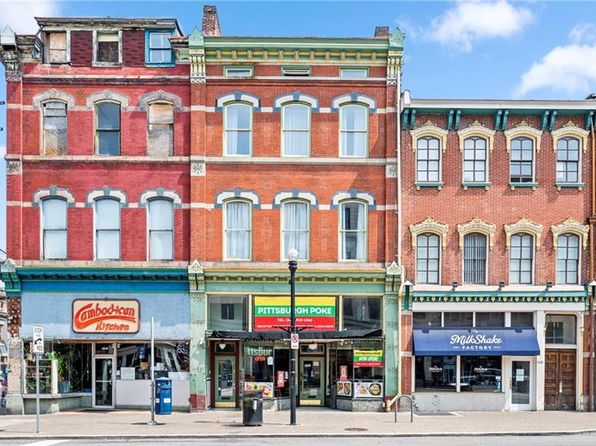

In [28]:
Image(filename='home.jpg')